#CONNECT TO DRIVE

In [33]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [34]:
%cd /gdrive/MyDrive/AI/project

/gdrive/MyDrive/AI/project


In [36]:
!unzip training_set.zip

Archive:  training_set.zip
replace S001_128.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: S001_128.mat            
replace S001_128_ann.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: S001_128_ann.mat        
replace S001_128_rpk.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: S001_128_rpk.mat        
  inflating: S002_128.mat            
  inflating: S002_128_ann.mat        
 extracting: S002_128_rpk.mat        
  inflating: S003_128.mat            
  inflating: S003_128_ann.mat        
  inflating: S003_128_rpk.mat        
  inflating: S004_128.mat            
  inflating: S004_128_ann.mat        
 extracting: S004_128_rpk.mat        
  inflating: S005_128.mat            
  inflating: S005_128_ann.mat        
  inflating: S005_128_rpk.mat        
  inflating: S006_128.mat            
  inflating: S006_128_ann.mat        
  inflating: S006_128_rpk.mat        
  inflating: S007_128.mat            
  inflating: S007_128_ann.mat        
 extracting: S007_1

# IMPORTING LIBRARIES

In [204]:
from scipy.io import loadmat
import numpy as np, os
from numpy import array, matrix, multiply
import ntpath
import scipy as sio

#DATA LOADING

In [205]:
input_directory = '/gdrive/MyDrive/AI/project/'

In [206]:
headers = []
recordings = []
for f in os.listdir(input_directory):
  g = ntpath.basename(f)
  g = os.path.splitext(g)[0]
  if g.startswith('S') and g[-1].isdigit():
    headers.append(g)
    mat_file = g + '.mat'
    x = loadmat(mat_file)
    recording = np.asarray(x['ecg'], dtype=np.float64)
    recordings.append(recording)
num_files = len(headers)

In [207]:
len(recordings)

105

In [208]:
rpks = []
for f in os.listdir(input_directory):
  g = ntpath.basename(f)
  g = os.path.splitext(g)[0]
  if g.startswith('S') and g.endswith('k'):
    mat_file = g + '.mat'
    x = loadmat(mat_file)
    rpk = np.asarray(x['rpeaks'])
    rpks.append(rpk)

In [209]:
anns = []
for f in os.listdir(input_directory):
  g = ntpath.basename(f)
  g = os.path.splitext(g)[0]
  if g.startswith('S') and g.endswith('n'):
    mat_file = g + '.mat'
    x = loadmat(mat_file)
    ann = np.asarray(x['labels'])
    anns.append(ann)

In [210]:
T = []
row = []
for i in range(num_files):
  row = [ headers[i], recordings[i], rpks[i], anns[i] ]
  T.append(row)

In [211]:
T[0]

['S001_128', array([[ 0.  ,  0.08],
        [ 0.04,  0.07],
        [ 0.03,  0.1 ],
        ...,
        [ 0.03,  0.01],
        [-0.01, -0.03],
        [ 0.  , -0.03]]), array([[    29],
        [   110],
        [   191],
        ...,
        [230184],
        [230261],
        [230338]], dtype=int32), array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype='<U1')]

In [212]:
T[0][:]

['S001_128', array([[ 0.  ,  0.08],
        [ 0.04,  0.07],
        [ 0.03,  0.1 ],
        ...,
        [ 0.03,  0.01],
        [-0.01, -0.03],
        [ 0.  , -0.03]]), array([[    29],
        [   110],
        [   191],
        ...,
        [230184],
        [230261],
        [230338]], dtype=int32), array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype='<U1')]

In [47]:
T[0][2]

array([[    29],
       [   110],
       [   191],
       ...,
       [230184],
       [230261],
       [230338]], dtype=int32)

In [46]:
T[0][3]

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype='<U1')

In [32]:
T[1][0]

'S001_128'

In [213]:
recordings_128=[]

for i in range(len(T)):
  if T[i][0].endswith('8'):
    recordings_128.append(T[i][1])



In [215]:
recordings_250 = []
for k in range(len(T)):
  if T[k][0].endswith('0'):
    recordings_250.append(T[k][1])

In [216]:
len(recordings_128)

65

In [217]:
len(recordings_250)

40

In [ ]:
#a questo punto resampling mettiamo tutto a 250 Hz
UPSAMPLING

In [218]:
import matplotlib.pyplot as plt

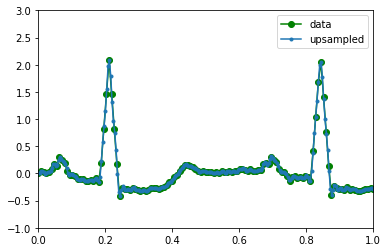

In [219]:
from scipy import signal
import matplotlib.pyplot as plt
ecgI_old = T[0][1][:,0]
fs_128 = 128
deltafs_128 = 1/fs_128
time_128 = int(deltafs_128*len(ecgI_old))
samples_128 = time_128*fs_128
fs_250 = 250
deltafs_250 = 1/fs_250
samples_250 = time_128*fs_250 
xold = np.linspace(0, time_128, samples_128, endpoint=False) #128 Hz
yold = ecgI_old
xnew = np.linspace(0, time_128, samples_250, endpoint=False) #250 Hz
ynew = signal.resample(yold, samples_250)
plt.plot(xold, yold, 'go-', xnew, ynew, '.-', 10, yold[0], 'ro')
plt.axis([0, 1, -1, 3])
plt.legend(['data', 'upsampled'], loc='best')
plt.show()

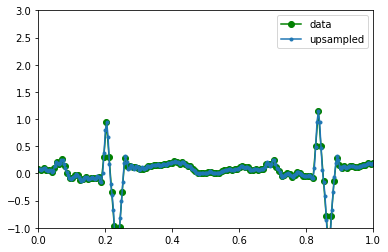

In [220]:
from scipy import signal
import matplotlib.pyplot as plt
ecgI_old = T[0][1][:,1]
fs_128 = 128
deltafs_128 = 1/fs_128
time_128 = int(deltafs_128*len(ecgI_old))
samples_128 = time_128*fs_128
fs_250 = 250
deltafs_250 = 1/fs_250
samples_250 = time_128*fs_250 
xold = np.linspace(0, time_128, samples_128, endpoint=False) #128 Hz
yold = ecgI_old
xnew = np.linspace(0, time_128, samples_250, endpoint=False) #250 Hz
ynew = signal.resample(yold, samples_250)
plt.plot(xold, yold, 'go-', xnew, ynew, '.-', 10, yold[0], 'ro')
plt.axis([0, 1, -1, 3])
plt.legend(['data', 'upsampled'], loc='best')
plt.show()

In [223]:
ytot = []
for i in range(65):
  ecg_old = T[i][1][:,:]
  fs_128 = 128
  deltafs_128 = 1/fs_128
  time_128 = int(deltafs_128*len(ecg_old))
  samples_128 = time_128*fs_128
  fs_250 = 250
  deltafs_250 = 1/fs_250
  samples_250 = time_128*fs_250 
  yold = ecg_old
  ynew = signal.resample(yold, samples_250)
  ytot.append(ynew)

In [224]:
len(ytot)

65

In [225]:

for i in range(len(recordings_250)):
  ytot.append(recordings_250[i][:])

In [226]:
ytot

[array([[-6.31593543e-17,  8.00000000e-02],
        [ 1.13149065e-02,  8.61966379e-02],
        [ 4.13788739e-02,  6.95457379e-02],
        ...,
        [-9.11542088e-03, -4.86122693e-02],
        [-3.88838519e-04, -3.20175080e-02],
        [ 3.14539236e-03,  2.67418125e-02]]),
 array([[-0.035     , -0.095     ],
        [-0.04483037, -0.10940217],
        [-0.0446849 , -0.10466024],
        ...,
        [-0.04060452, -0.00396803],
        [-0.03539783, -0.0035143 ],
        [-0.02957515, -0.0505459 ]]),
 array([[-0.46      ,  0.56      ],
        [-0.47652398,  0.68655808],
        [-0.49057828,  0.60565421],
        ...,
        [-0.21047367, -0.12219055],
        [-0.34469707, -0.11782018],
        [-0.42754078,  0.18643659]]),
 array([[-0.56      ,  0.43      ],
        [-0.57822579,  0.47237374],
        [-0.56057883,  0.56477562],
        ...,
        [ 0.17396085,  0.12495612],
        [ 0.1149202 ,  0.28293334],
        [-0.28909238,  0.39347457]]),
 array([[-0.27      , -0.02 

In [227]:
C = []
row = []
for i in range(num_files):
  row = [ headers[i], ytot[i], rpks[i], anns[i] ]
  C.append(row)

[['S001_128', array([[-6.31593543e-17,  8.00000000e-02],
         [ 1.13149065e-02,  8.61966379e-02],
         [ 4.13788739e-02,  6.95457379e-02],
         ...,
         [-9.11542088e-03, -4.86122693e-02],
         [-3.88838519e-04, -3.20175080e-02],
         [ 3.14539236e-03,  2.67418125e-02]]), array([[    29],
         [   110],
         [   191],
         ...,
         [230184],
         [230261],
         [230338]], dtype=int32), array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype='<U1')],
 ['S002_128', array([[-0.035     , -0.095     ],
         [-0.04483037, -0.10940217],
         [-0.0446849 , -0.10466024],
         ...,
         [-0.04060452, -0.00396803],
         [-0.03539783, -0.0035143 ],
         [-0.02957515, -0.0505459 ]]), array([[    91],
         [   209],
         [   326],
         ...,
         [230062],
         [230152],
         [230296]], dtype=int32), array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype='<U1')],
 ['S004_128', array([[-0.46      ,  0.56      ],
     

array([[-6.31593543e-17,  8.00000000e-02],
       [ 1.13149065e-02,  8.61966379e-02],
       [ 4.13788739e-02,  6.95457379e-02],
       ...,
       [-9.11542088e-03, -4.86122693e-02],
       [-3.88838519e-04, -3.20175080e-02],
       [ 3.14539236e-03,  2.67418125e-02]])

In [228]:
"3 - Plot signal length distribution"
fs = 250
# Create empty list to contain the different recording lenghts
length_recordings = list()

# Iterate through the different signals stored in "recordings": store signal 
# length and divide by sampling frequenzy to obtain it in senconds.
for rec_temp in recordings:
  length_recordings.append(len(rec_temp[0,:])/fs)

# Transform to pandas series and plot histogram.
length_rec_s = pd.Series(length_recordings)
ax = length_rec_s.plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("Time [s]")
ax.set_title("Signal length distribution")


"4 - Plot a signal from each category"
# Tranform labels_adapt to pandas series to be able to obtain a boolean vector
# containing the positions of AF and NSR labels 
labels_adapt = pd.Series(labels_adapt)
idx_AF = labels_adapt == 'AF'
idx_NSR = labels_adapt == 'NSR'

pos_AF = np.where(idx_AF)[0]
pos_NSR = np.where(idx_NSR)[0]

lead = 0

patient = pos_AF[0]
signal_temp = recordings[patient]
t = np.arange(0, signal_temp.shape[1]/fs, 1/fs) 
fig, axs = plt.subplots()
axs.set_title("Patient:" + str(patient) + " - Label:" + labels_adapt[patient])
axs.plot(t, signal_temp[lead,:], color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

patient = pos_NSR[3]
signal_temp = recordings[patient]
t = np.arange(0, signal_temp.shape[1]/fs, 1/fs) 
fig, axs = plt.subplots()
axs.set_title("Patient:" + str(patient) + " - Label:" + labels_adapt[patient])
axs.plot(t, signal_temp[lead,:], color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

NameError: ignored